# Analyzing a Time Series of the Thames River in Python


Here's a map of the locations of the tidal gauges along the River Thames in London.

![](locations.png)

In [1]:
# Package imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1: Read one file to explore the data format and prepare the data for analysis.

### Instructions

- Use pandas to read the London Bridge dataset from the CSV file named `Data/10-11_London_Bridge.txt` and assign it to the variable `lb`.
- Display `lb`.

In [6]:
lb = pd.read_csv('Data/10-11_London_Bridge.txt')
lb

,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,01/05/1911 15:40:00,3.7130,1,NaN
1,02/05/1911 11:25:00,-2.9415,0,NaN
2,02/05/1911 16:05:00,3.3828,1,NaN
3,03/05/1911 11:50:00,-2.6367,0,NaN
4,03/05/1911 16:55:00,2.9256,1,NaN
...,...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1,NaN
115499,31/12/1995 02:32:00,-1.6000,0,NaN
115500,31/12/1995 08:59:00,3.2000,1,NaN
115501,31/12/1995 15:03:00,-1.8000,0,NaN


Since one of the column headings in the csv file had a comma (`"flag, HW=1 or LW=0"`), `pd.read_csv` has created an extra, empty column. We'll need to drop this extra column and rename our column headings. Shorter and more memorable column names will facilitate our analysis later on.


In [7]:
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115503 entries, 0 to 115502
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date and time         115503 non-null  object 
 1    water level (m ODN)  115503 non-null  object 
 2    flag                 115503 non-null  int64  
 3    HW=1 or LW=0         0 non-null       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [12]:
df = lb[lb.columns[0:3]]
df.columns = ['datetime','water_level','is_high_tide']

Calling `lb.info()` above showed us both the `datetime` and `water_level` columns are of type `object`. We'll convert these to `datetime` and `water_level`, respectively. We'll also add two columns, `month` and `year`, which we'll need to access later on.


In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['water_level'] = df['water_level'].astype(float)

In [16]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

Before moving on to conduct analysis, let's define a helper function for data cleaning so we don't have to do this each time. The function takes a `DataFrame` (which we'll read from our `.txt` files), renames the columns, formats the `datetime` column, and converts `water_level` to a `float` data type.

In [17]:
def clean_data(data):
    
    data = data[data.columns[0:3]]
    data.columns = ['datetime','water_level','is_high_tide']
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['water_level'] = data['water_level'].astype(float)
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year
    
    return data

## Task 2. Analyze the London Bridge data to get a sense of the water level.

Let's begin analyzing the data with a `displot()` or `hist` of `water_level`. This plot shows that the data is bimodal, meaning it has two separate peaks. When we plot the data with `is_high_tide=0 `and `is_high_tide=1`, separately we get two approximately normal distributions, with separate means and variances. Moving forward, we'll analyze low tide and high tide data separately.

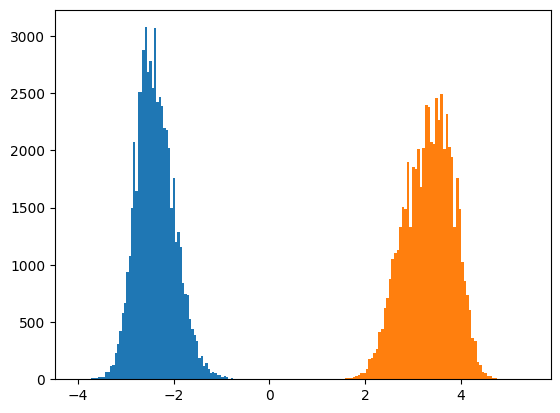

In [25]:
plt.hist(df.query('is_high_tide==0')['water_level'],bins=100)
plt.hist(df.query('is_high_tide==1')['water_level'],bins=100)
plt.show()

Boxplots will give us a sense of the min, max, range, and outliers of the data. We'll create these separately for high tide and low tide. By default, the whiskers of the boxplot will show us 1.5 * the interquartile range.

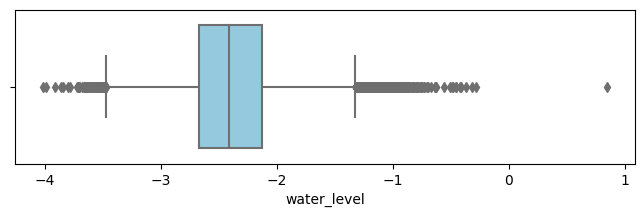

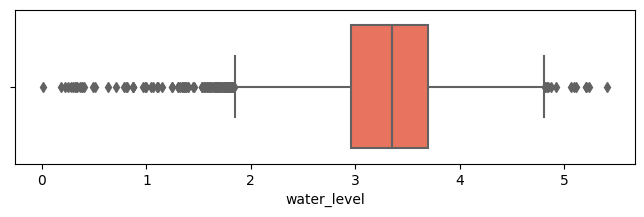

In [28]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==0'),x='water_level',color='SkyBlue')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==1'),x='water_level',color='Tomato')
plt.show()

We can use the information gathered from our boxplots and summary statistics to count the number of days London Bridge has had high tide over the last 84 years.

In [29]:
df.query('is_high_tide==1').describe()

,water_level,is_high_tide,month,year
count,57909.000000,57917.0,57917.000000,57917.000000
mean,3.318373,1.0,6.534126,1953.701400
std,0.509422,0.0,3.441167,24.334694
min,0.010000,1.0,1.000000,1911.000000
25%,2.956400,1.0,4.000000,1933.000000
50%,3.352600,1.0,7.000000,1954.000000
75%,3.700000,1.0,10.000000,1975.000000
max,5.409900,1.0,12.000000,1995.000000


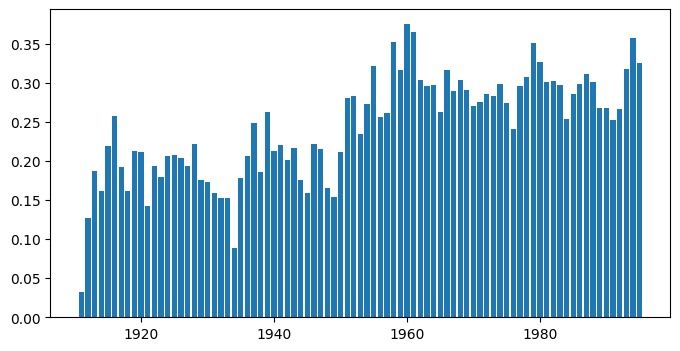

In [38]:
variable = 3.7

plt.figure(figsize=(8,4))
all_days = df.query('is_high_tide==1').groupby('year').count()['is_high_tide']
high_days = df.query(f'(is_high_tide==1) & (water_level>{variable})').groupby('year').count()['is_high_tide']
ratio = (high_days/all_days).reset_index()
plt.bar(ratio.year,ratio.is_high_tide)
plt.show()

In [39]:
df.query('(is_high_tide==0)').describe()

,water_level,is_high_tide,month,year
count,57580.000000,57586.0,57586.000000,57586.000000
mean,-2.383737,0.0,6.532491,1953.671708
std,0.399748,0.0,3.444258,24.366551
min,-4.013000,0.0,1.000000,1911.000000
25%,-2.666900,0.0,4.000000,1933.000000
50%,-2.412900,0.0,7.000000,1954.000000
75%,-2.128700,0.0,10.000000,1975.000000
max,0.842900,0.0,12.000000,1995.000000


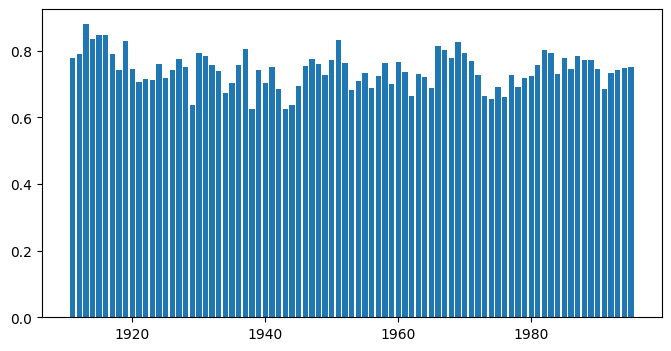

In [41]:
variable = -2.66

plt.figure(figsize=(8,4))
all_days = df.query('is_high_tide==0').groupby('year').count()['is_high_tide']
high_days = df.query(f'(is_high_tide==0) & (water_level>{variable})').groupby('year').count()['is_high_tide']
ratio = (high_days/all_days).reset_index()
plt.bar(ratio.year,ratio.is_high_tide)
plt.show()

## Task 3. Assess monthly trends in water level for 1927, 1928 and 1929.

In [43]:
water_level = pd.DataFrame()

for year in [1927, 1928, 1929]:
    level_per_year = df.query(f'year=={year}').set_index('datetime')
    level_per_year = level_per_year.groupby('is_high_tide').resample('1M').median()['water_level'].reset_index()
    level_per_year['month'] = level_per_year.datetime.dt.month
    level_per_year['year'] = level_per_year.datetime.dt.year  
    water_level = pd.concat([water_level,level_per_year]).reset_index(drop=True)

In [44]:
water_level

,is_high_tide,datetime,water_level,month,year
0,0,1927-01-31,-2.3700,1,1927
1,0,1927-02-28,-2.3827,2,1927
2,0,1927-03-31,-2.4081,3,1927
3,0,1927-04-30,-2.4589,4,1927
4,0,1927-05-31,-2.5351,5,1927
...,...,...,...,...,...
67,1,1929-08-31,3.1161,8,1929
68,1,1929-09-30,3.2304,9,1929
69,1,1929-10-31,3.3574,10,1929
70,1,1929-11-30,3.4590,11,1929


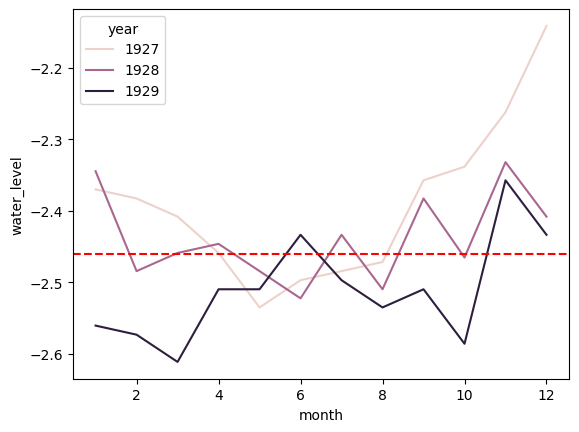

In [46]:
sns.lineplot(data=water_level[water_level['is_high_tide']==0],
            y='water_level',x='month',hue='year')
plt.axhline(-2.46,0,12,linestyle='--',color='red')
plt.show()

## Task 4. Beginning a forecasting model for London Bridge: a taste of autocorrelation.

In [2]:
df_c = df.query('(year==1928) & (month<=6)').reset_index()
fig, ax = plt.subplots(figsize=(20,4))
sns.lineplot(data=df_c.query('is_high_tide==1'),x='datetime',y='water_level', ax=ax)

When looking at the **high tide levels** for a sample of the data, it appears to have some monthly peaks and troughs.

We can compute a metric called autocorrelation to quantify this repeating pattern. We find that autocorrelation is highest at 15 days (waxing and waning of the moon).

In [2]:
def autocorr(data,level='1D',flag=0):
    high_low = {0:'high',1:'low'}
    level_dict = {'1D':'daily','15D':'biweekly','1M':'monthly','1Y':'annual'}    
    data = data[data['is_high_tide']==flag].set_index('datetime').resample(level).mean()['water_level']
    diff = data.diff()
    autocorrelation = diff.autocorr()
    print(f"The autocorrelation of {level_dict[level]} {high_low[flag]} values is %4.2f" %(autocorrelation))

In [2]:
autocorr(df,level='1Y',flag=1)
autocorr(df,level='1Y',flag=0)
autocorr(df,level='1M',flag=1)
autocorr(df,level='1M',flag=0)
autocorr(df,level='15D',flag=1)
autocorr(df,level='15D',flag=0)
autocorr(df,level='1D',flag=1)
autocorr(df,level='1D',flag=0)